<a href="https://colab.research.google.com/github/jj7d/D7/blob/main/Copy_of_LAP1_335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 


In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras. models import Sequential 
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print ("x_train original shape", x_train.shape)
print ("y_train original shape", y_train.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


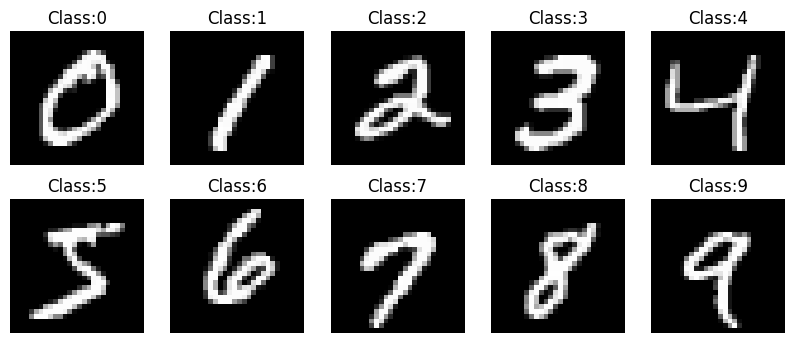

In [ ]:
class_labels_dict = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}
fig = plt.figure ( figsize = (10,4))
for i in range ( 10 ) :
  plt.subplot(2,5,i+1)
  img = x_train [ y_train == i ] [ 0 ]
  plt.imshow ( img , cmap = 'gray' , interpolation = 'none' )
  plt.title("Class:{}".format(class_labels_dict[i]))
  plt.axis('off')

In [ ]:
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape ( x_test.shape [ 0 ] , 784 )
x_train = x_train.astype ('float32')
x_test = x_test.astype ('float32')
print ( " Training matrix shape " , x_train.shape )
print ( " Testing matrix shape " , x_test.shape )

 Training matrix shape  (60000, 784)
 Testing matrix shape  (10000, 784)


In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
num_classes = 10 
Y_train = to_categorical(y_train,num_classes)
Y_test = to_categorical(y_test,num_classes)

In [ ]:
model = Sequential ()
model.add ( Dense (512 , input_shape = (784 ,)))
model.add (Activation('relu'))
model.add (Dense ( 512 ) )
model.add (Activation ('relu'))
model.add (Dense(num_classes ))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
history = model.fit ( x_train , Y_train , batch_size = 128 , epochs = 25 , verbose = 1 , validation_data = ( x_test , Y_test ))

Epoch 1/25
469/469 [==============================] - 8s 15ms/step - loss: 10.6494 - accuracy: 0.1003 - val_loss: 11.4116 - val_accuracy: 0.0974
Epoch 2/25
469/469 [==============================] - 6s 13ms/step - loss: 11.3678 - accuracy: 0.0975 - val_loss: 11.4116 - val_accuracy: 0.0974
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 11.3678 - accuracy: 0.0975 - val_loss: 11.4116 - val_accuracy: 0.0974
Epoch 4/25
469/469 [==============================] - 6s 13ms/step - loss: 11.3678 - accuracy: 0.0975 - val_loss: 11.4116 - val_accuracy: 0.0974
Epoch 5/25
469/469 [==============================] - 7s 14ms/step - loss: 11.3678 - accuracy: 0.0975 - val_loss: 11.4116 - val_accuracy: 0.0974
Epoch 6/25
469/469 [==============================] - 6s 13ms/step - loss: 11.3678 - accuracy: 0.0975 - val_loss: 11.4116 - val_accuracy: 0.0974
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 11.3678 - accuracy: 0.0975 - val_loss: 11.4116 - val_ac

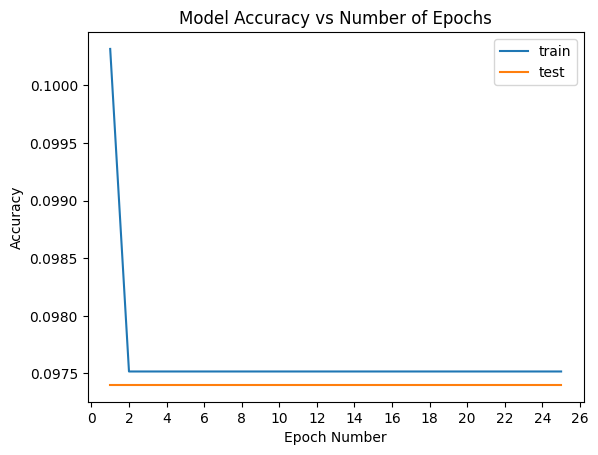

In [ ]:
plt.plot ( range ( 1,1 + len ( history.history ['accuracy'])) , history.history ['accuracy'])
plt.plot ( range ( 1,1 + len ( history.history ['val_accuracy'])) , history.history ['val_accuracy'])
plt.title ('Model Accuracy vs Number of Epochs')
plt.ylabel ('Accuracy')
plt.xlabel ('Epoch Number')
plt.legend (['train','test'],loc = 'best')
plt.xticks (np.arange (0,28,2))
plt.show ()